# Interpretability-framework - Uncertainty Tutorial 2
in this notebook you will learn how to use the interpretability framework in an image segmentation example and how to interpret the results.

## Segmentation example with FCN32s
Demonstration of uncertainty measurement and visualization in an segmentation example.

In [2]:
import torch
from torch.nn import Sequential
from torch.nn import Softmax

from interpretability_framework import modules
from pytorch_fcn.fcn32s import FCN32s

import data_utils
from data_utils import DataConfig
import matplotlib.pyplot as plt

### Step 1:
Load a pre-trained segmentation model, which should be evaluated. 

**Note: Monte Carlo Dropout ensembles only achieve proper results when used on a net which was trained with dropout. So check if the model you would like to use has dropout layers active in training.**

We use a pre-trained FCN32 model for demonstration.

In [3]:
fully_conf_net = FCN32s()
fully_conf_net.load_state_dict(torch.load(FCN32s.download()))

[/home/christina/data/models/pytorch/fcn32s_from_caffe.pth] Checking md5 (8acf386d722dc3484625964cbe2aba49)


### Step 2:
Wrap your net with an PredictionEnsemble layer. This layer collects an ensemble of predictions with Monte Carlo dropout. This ensemble will be used for measuring uncertainties.

Build and prepare the ensemble.

In [4]:
ensemble = Sequential(
    modules.MeanEnsemble(fully_conf_net, 20),
    Softmax(dim=1)
)

ensemble.eval()

Sequential(
  (0): MeanEnsemble(
    (inner): FCN32s(
      (conv1_1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(100, 100))
      (relu1_1): ReLU(inplace)
      (conv1_2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (relu1_2): ReLU(inplace)
      (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=True)
      (conv2_1): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (relu2_1): ReLU(inplace)
      (conv2_2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (relu2_2): ReLU(inplace)
      (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=True)
      (conv3_1): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (relu3_1): ReLU(inplace)
      (conv3_2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (relu3_2): ReLU(inplace)
      (conv3_3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), paddi

### Step 3:

Load and show the image, which should be evaluated.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


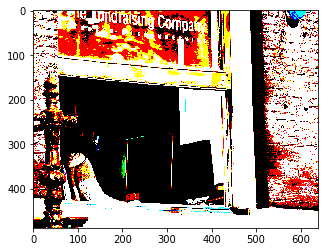

In [5]:
img = data_utils.get_example_from_path("../data/fcn_example.jpg", DataConfig.FCN32)
    
plt.imshow(img.squeeze(dim=0).permute(1, 2, 0))
plt.show()

### Step 4: 
Calculate a segmentation prediction with the MC Dropout Ensemble.

**Attention! The next cell contains high dimensional computations. We recommend running it with a GPU device.**


In [ ]:
pred = ensemble(img)
plt.imshow(pred.argmax(dim=1).squeeze(dim=0).detach().numpy())
plt.show()

#TODO: plot uncertainties
# calculate data uncertainty

## Interpretation of results

In contrast to the image classification example, we calculate predictions and uncertainties for each pixel of the image. 
Hence, we can visualize the pixel uncertainties as an image and add a color scheme to make interpretations easier (red = high uncertainty, blue = low uncertainty).

What can we see in these uncertainty images?

* **Total predictive entropy:** the total predictive uncertainty of each pixel, we can detect which pixels have high uncertainty and therefore, are predicted with low confidence.
* **Mutual Information:** the model uncertainty of each pixel, we can detect which pixels are predicted with low confidence due to the model.
* **Data Uncertainty:** we can detect which pixels are predicted with low confidence due to the quality of the data (image).

